Analizar la presencia de valores extremos en un conjunto de datos y aplicar metrodos estadisticos univariados y multivariados para su deteccion y manejo
* Años edad en años 
* Ingresos : Ingresos anuales 
* Nivel de estres, nivel de stress escala de 1 a 10 ( con valores extremos introducidos)
* Nivel de ansiedad : nivel de ansiedad en una escala de 1 a 10 

Se pide : 
1. Identificar valores extremos univariados 
* Utiliza el metodo de desviacion estandar para detectar valores extremos en cada variable
* Aplica el rango intercuartilico (IQR) para detectar valores extremos en las variables numericas 
* Genera graficos de caja y bigotes para cada variable 


## Lectura de variables 

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
url= os.path.join(os.getcwd(), "data", "Ejer_1.xlsx")
data = pd.read_excel(url, sheet_name="Base_C2")
data.head()

,ID,Edad,Ingreso,Nivel_Estres,Nivel_Ansiedad
0,1,34,28769,8.9,9.5
1,2,29,43690,7.7,4.5
2,3,90,44859,7.3,9.7
3,4,42,37966,7.3,9.1
4,5,28,47581,4.2,2.8


## Descriptivos 

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              100 non-null    int64  
 1   Edad            100 non-null    int64  
 2   Ingreso         100 non-null    int64  
 3   Nivel_Estres    100 non-null    float64
 4   Nivel_Ansiedad  100 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 4.0 KB


In [3]:
data.describe().round(2)

,ID,Edad,Ingreso,Nivel_Estres,Nivel_Ansiedad
count,100.00,100.00,100.00,100.00,100.00
mean,50.50,29.58,51454.35,5.40,5.55
std,29.01,9.79,20908.61,2.61,2.86
min,1.00,5.00,5000.00,0.00,1.10
25%,25.75,25.00,37915.25,3.48,2.52
50%,50.50,29.00,51261.50,5.65,5.45
75%,75.25,33.25,58072.50,7.30,8.10
max,100.00,90.00,200000.00,12.00,9.90


## Grafico de dispersion


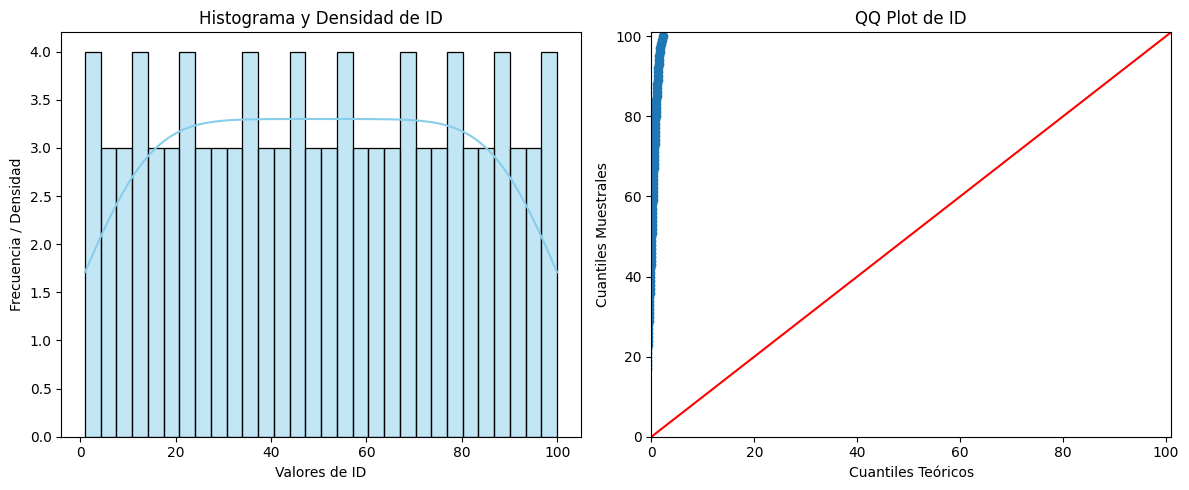

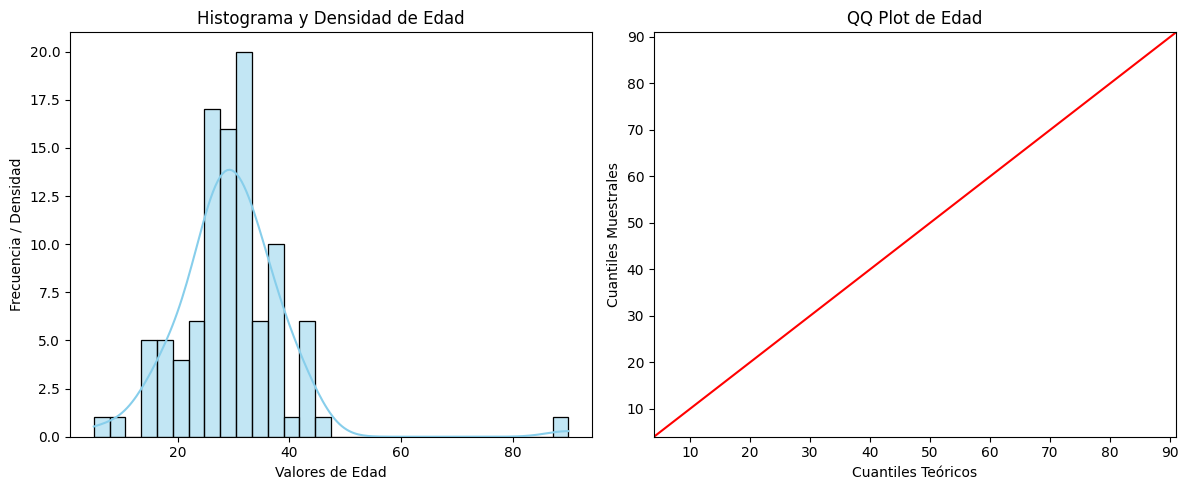

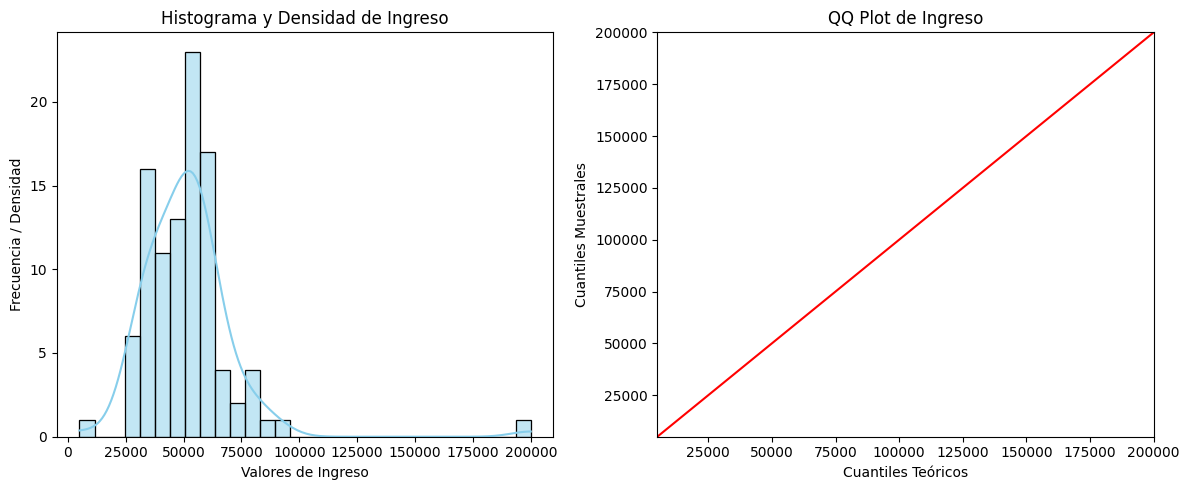

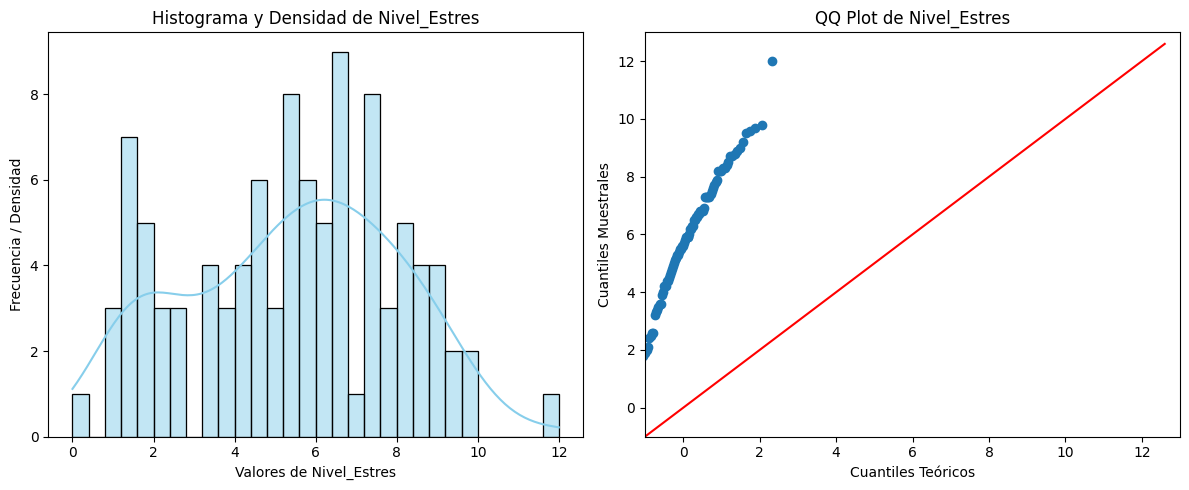

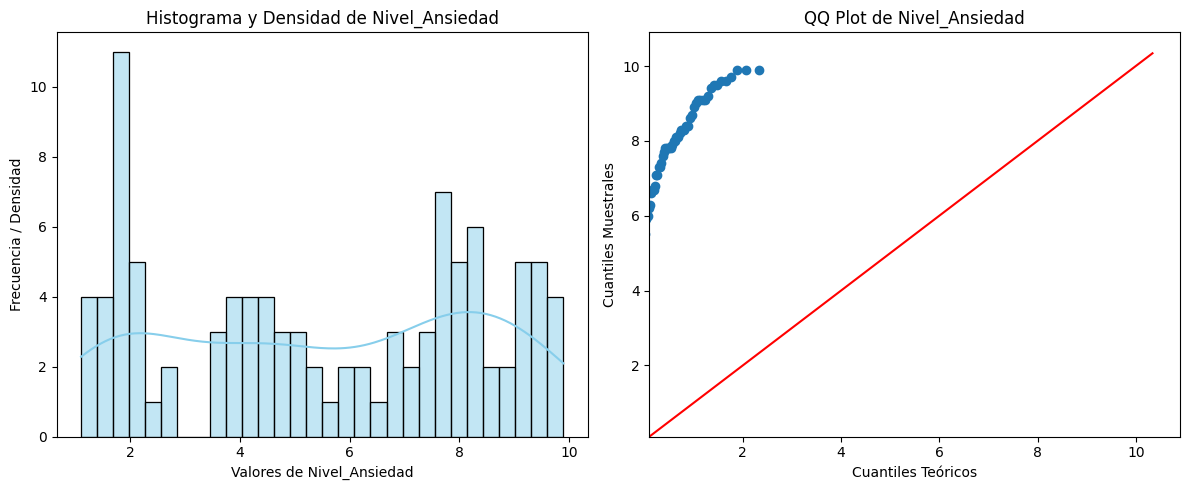

In [4]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Iterar sobre las columnas del DataFrame
for i in data.columns:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # Configurar dos gráficos en una fila

    # Histograma con densidad de probabilidad (gráfico 1)
    sns.histplot(data[i].values, kde=True, ax=ax[0], bins=30, color="skyblue", edgecolor="black")
    ax[0].set_title(f"Histograma y Densidad de {i}")
    ax[0].set_xlabel(f"Valores de {i}")
    ax[0].set_ylabel("Frecuencia / Densidad")

    # Q-Q Plot (gráfico 2)
    sm.qqplot(data[i].values, line='45', ax=ax[1])
    ax[1].set_title(f"QQ Plot de {i}")

    # Ajustar los límites de los ejes del Q-Q Plot
    data_min, data_max = data[i].min(), data[i].max()
    ax[1].set_xlim(data_min - 1, data_max + 1)
    ax[1].set_ylim(data_min - 1, data_max + 1)
    ax[1].set_xlabel("Cuantiles Teóricos")
    ax[1].set_ylabel("Cuantiles Muestrales")

    # Ajustar el diseño del gráfico
    plt.tight_layout()
    plt.show()

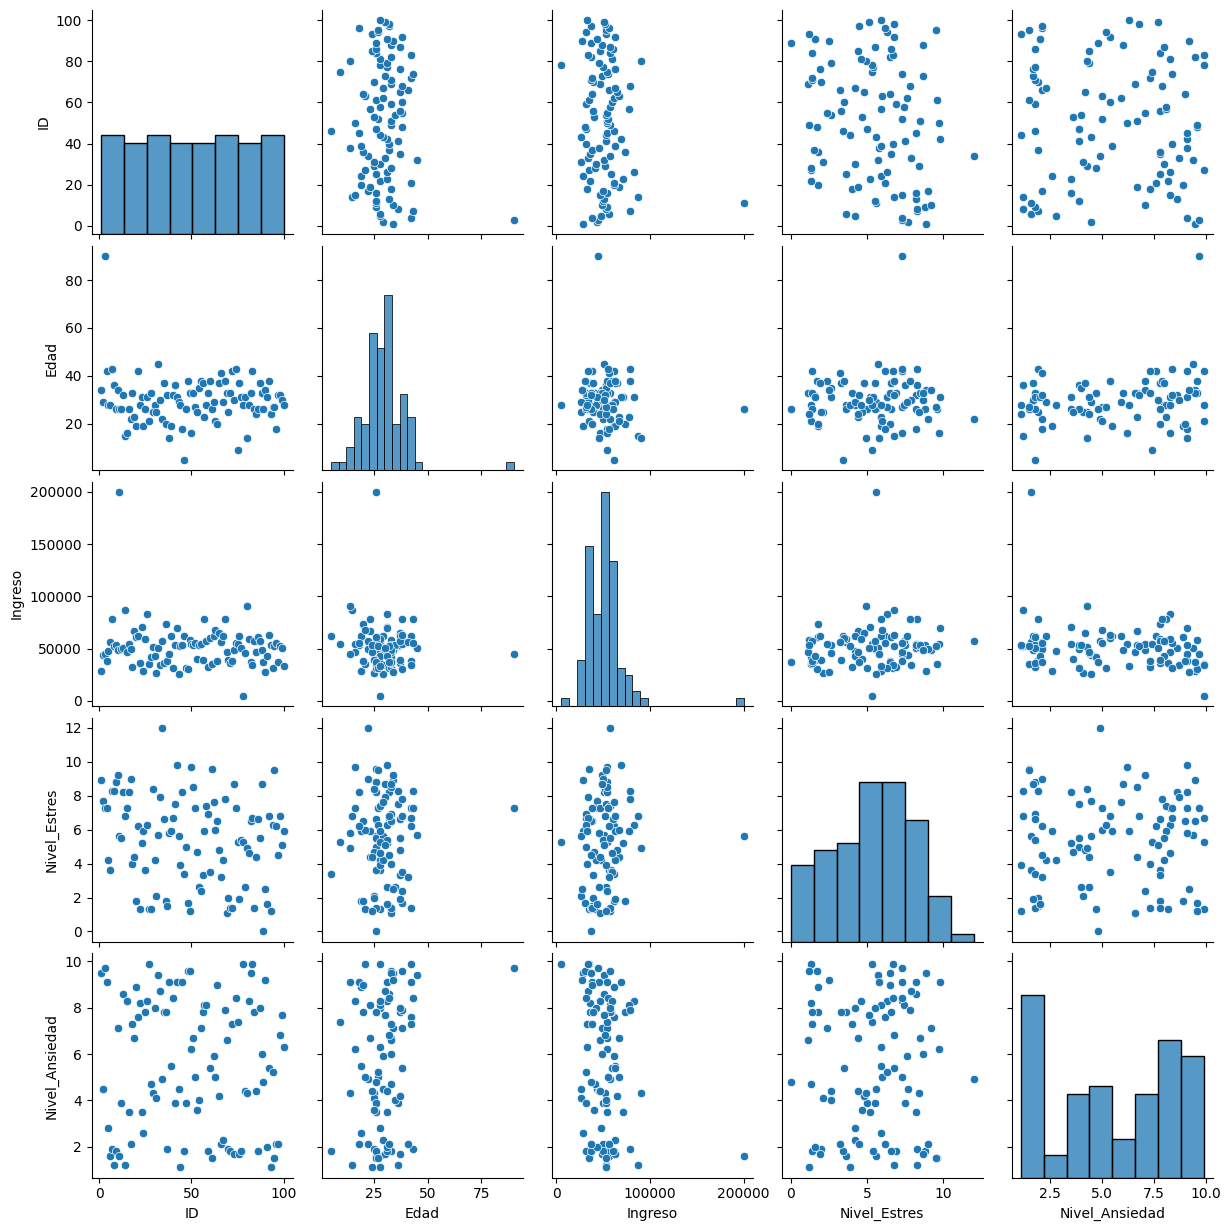

In [5]:
#grafico de dispersion variables numericas
sns.pairplot(data)

In [ ]:
#grafico de caras variables (rostros)   
sns.pairplot(data, hue='Genero')

<Axes: >

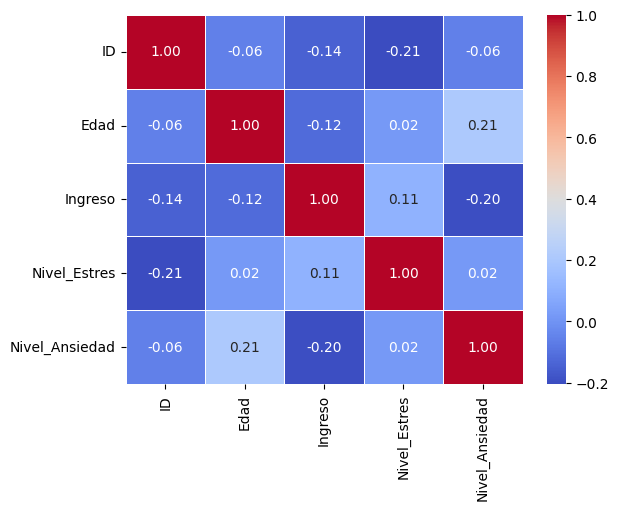

In [28]:
## grafico de calor mapa correlaciones en seaborn
# Compute the correlation matrix
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5) 


In [ ]:
# grafico en tres dimensiones scatterplot
fig = px.scatter_3d(data, x='Edad', y='Ingreso', z='Nivel_Estres')
fig.show()

In [12]:
#Limpieza de datos por variable usando iqr reemplazando el outlier por la mediana
def iqr_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, df[col].median(), df[col])
    df[col] = np.where(df[col] > upper_bound, df[col].median(), df[col])
    return df

data_clean = iqr_outliers(data, 'Ingreso')
data_clean = iqr_outliers(data_clean, 'Edad')
data_clean = iqr_outliers(data_clean, 'Nivel_Estres')
data_clean = iqr_outliers(data_clean, 'Nivel_Ansiedad')



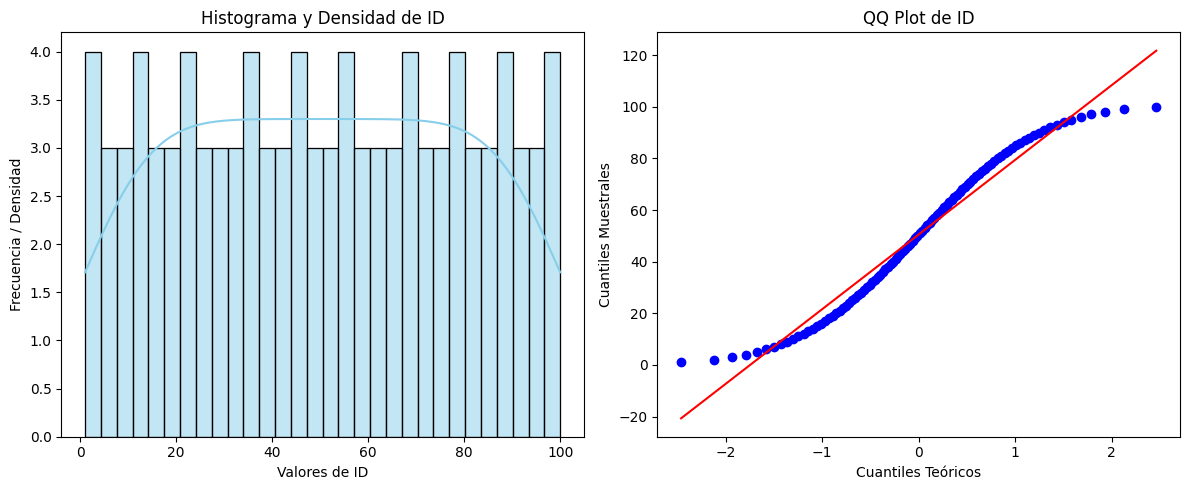

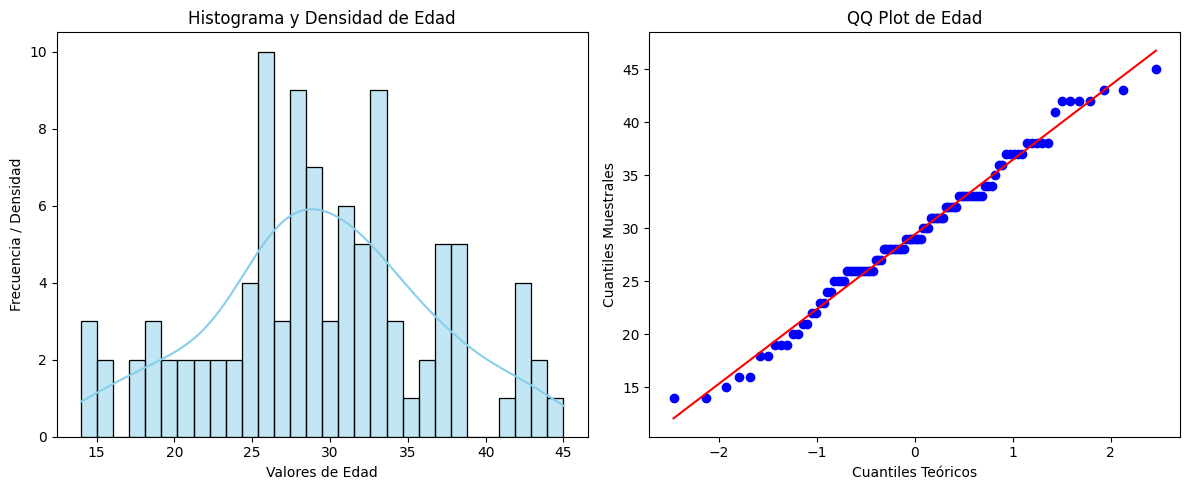

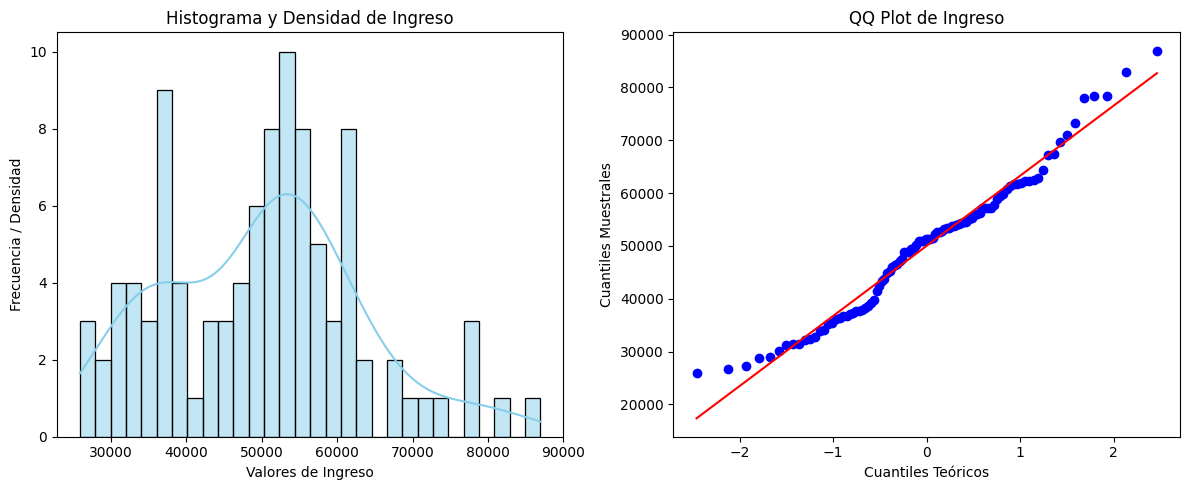

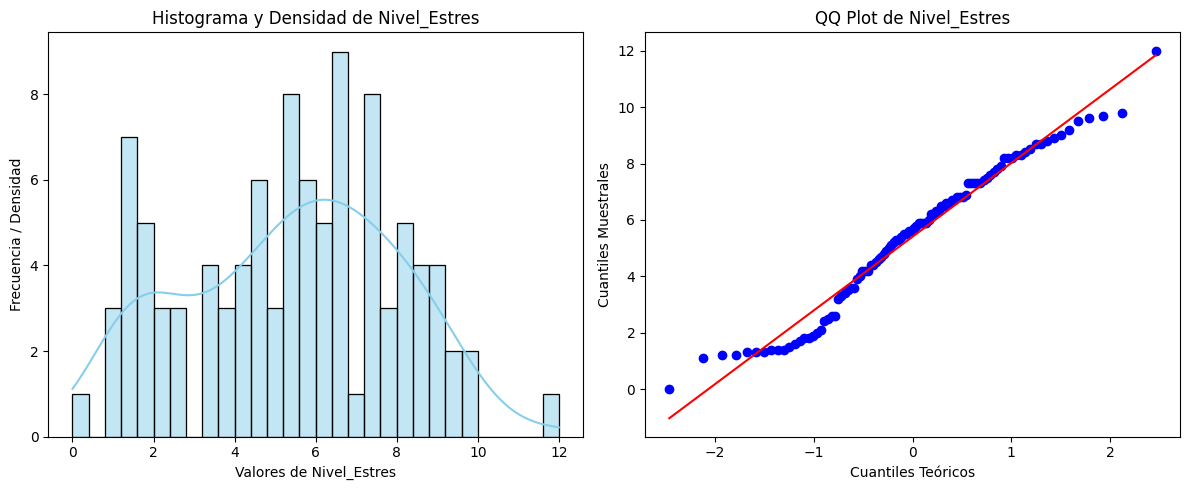

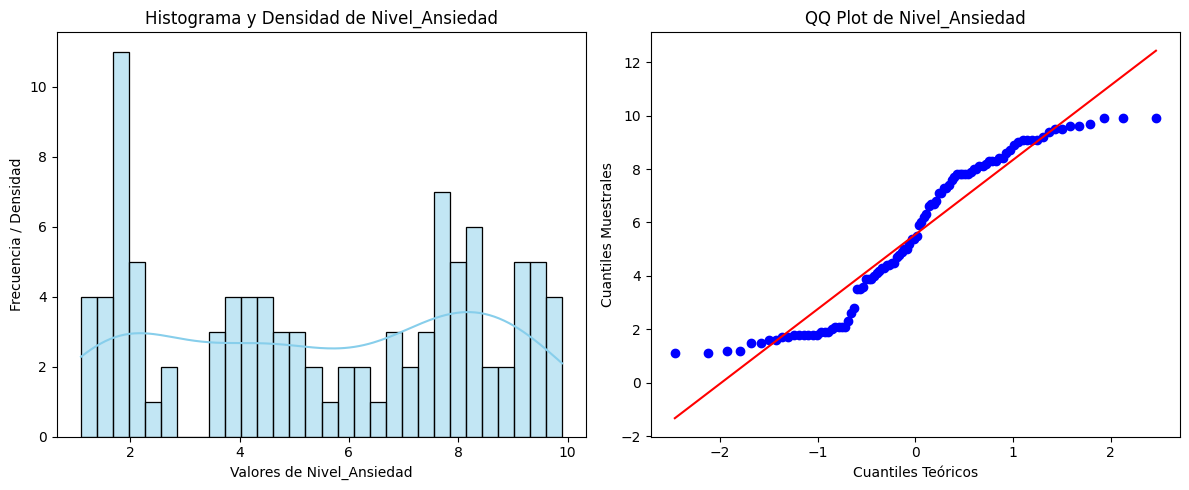

In [24]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import probplot
for i in data_clean.columns:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5)) 
    sns.histplot(data_clean[i].values, kde=True, ax=ax[0], bins=30, color="skyblue", edgecolor="black")
    ax[0].set_title(f"Histograma y Densidad de {i}")
    ax[0].set_xlabel(f"Valores de {i}")
    ax[0].set_ylabel("Frecuencia / Densidad")
    probplot(data_clean[i], dist="norm", plot=plt)
    ax[1].set_title(f"QQ Plot de {i}")
    ax[1].set_xlabel("Cuantiles Teóricos")
    ax[1].set_ylabel("Cuantiles Muestrales")
    plt.tight_layout()
    plt.show()

In [19]:
# Genera graficos de caja y bigotes en plotly para cada las variables (ciclo for )
for i in data_clean.columns:
    fig = px.box(data_clean, y=i, points="all", title=f"Boxplot de {i}")
    fig.show()





In [20]:
#limpieza de outliers por variable usando 3 desviaciones standar

def std_outliers(df, col):
    std = df[col].std()
    mean = df[col].mean()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std

    # Identificar los outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].tolist()

    # Reemplazar los outliers por la mediana
    median = df[col].median()
    df[col] = np.where(df[col] < lower_bound, median, df[col])
    df[col] = np.where(df[col] > upper_bound, median, df[col])

    return df, outliers
data_clean = std_outliers(data, 'Ingreso')
data_clean = std_outliers(data_clean, 'Edad')
data_clean = std_outliers(data_clean, 'Nivel_Estres')
data_clean = std_outliers(data_clean, 'Nivel_Ansiedad')


In [21]:
# Generar Q-Q plots para todas las variables
for col in variables:
    plt.figure(figsize=(8, 6))
    
    plt.title(f"Q-Q Plot de la variable {col}")
    plt.xlabel("Cuantiles teóricos")
    plt.ylabel("Cuantiles de la muestra")
    plt.grid(True)
    plt.show()

,ID,Edad,Ingreso,Nivel_Estres,Nivel_Ansiedad
0,1,34.0,28769.0,8.9,9.5
1,2,29.0,43690.0,7.7,4.5
2,3,29.0,44859.0,7.3,9.7
3,4,42.0,37966.0,7.3,9.1
4,5,28.0,47581.0,4.2,2.8
...,...,...,...,...,...
95,96,18.0,55780.0,6.2,2.1
96,97,32.0,36742.0,4.5,2.1
97,98,32.0,52306.0,6.8,6.8
98,99,30.0,50873.0,5.1,7.7


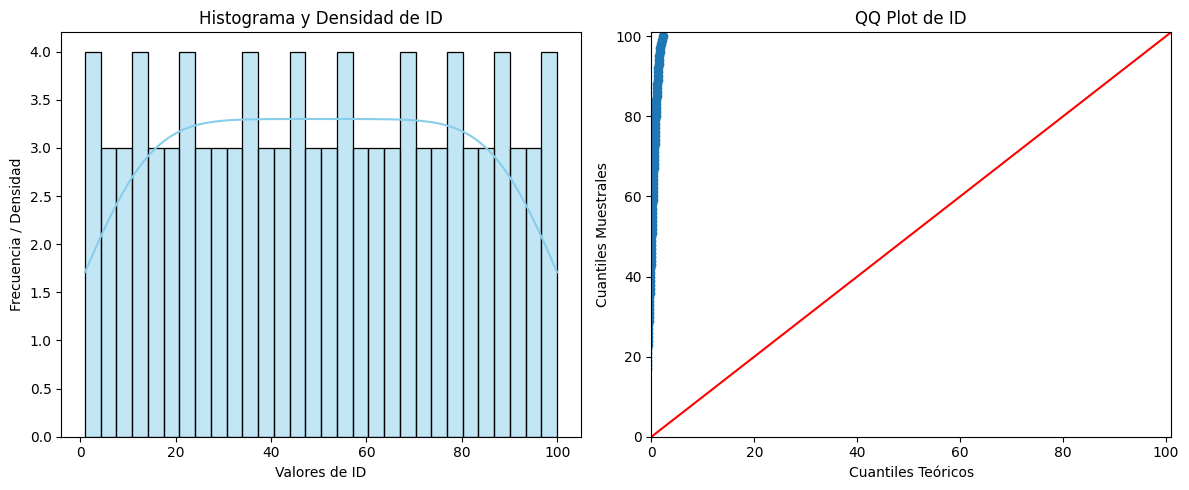

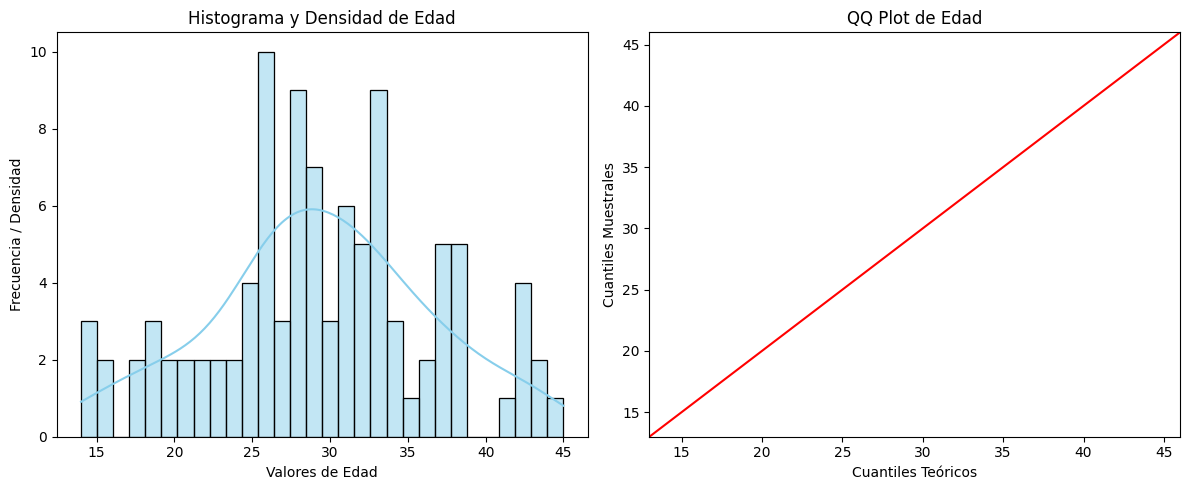

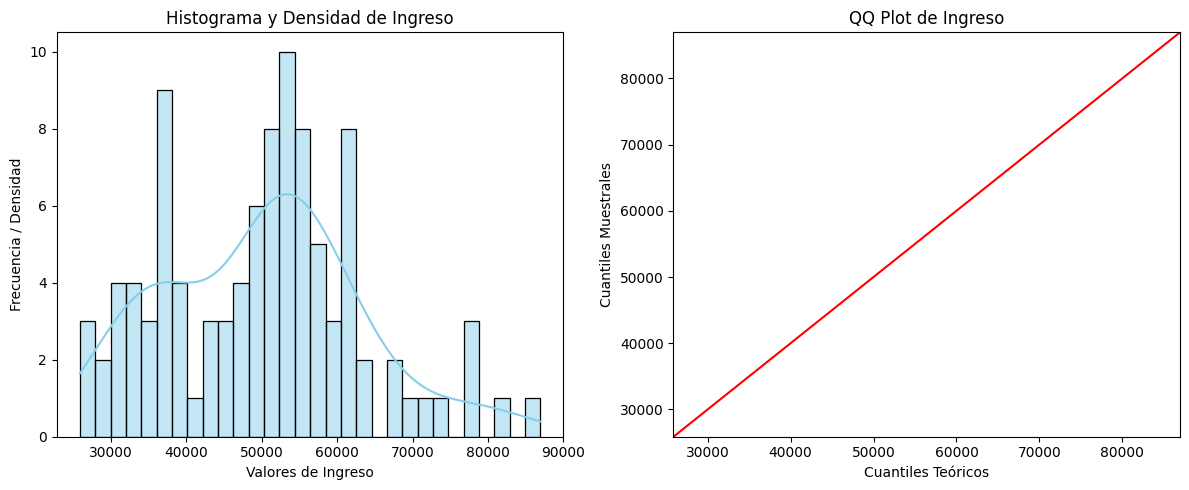

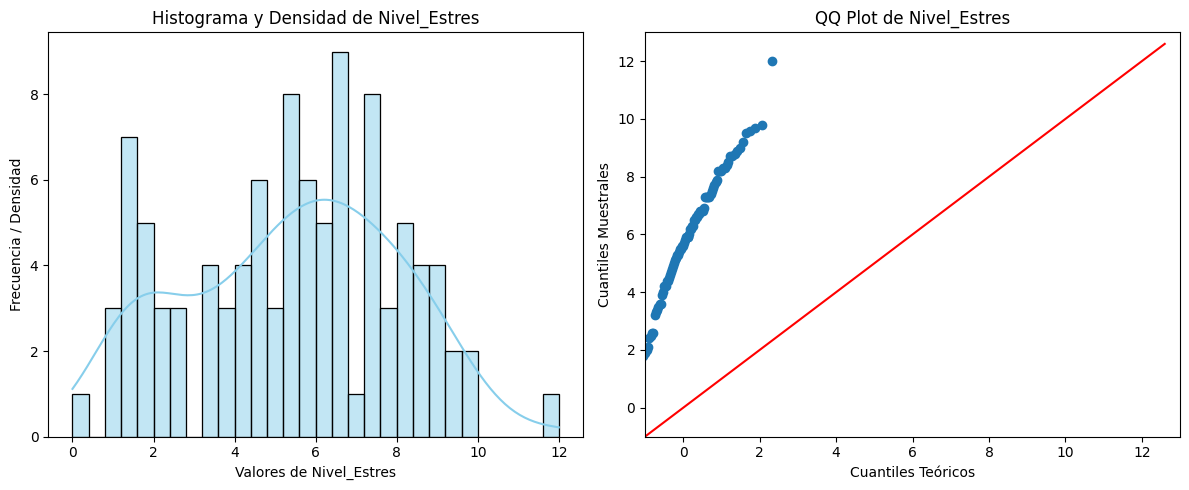

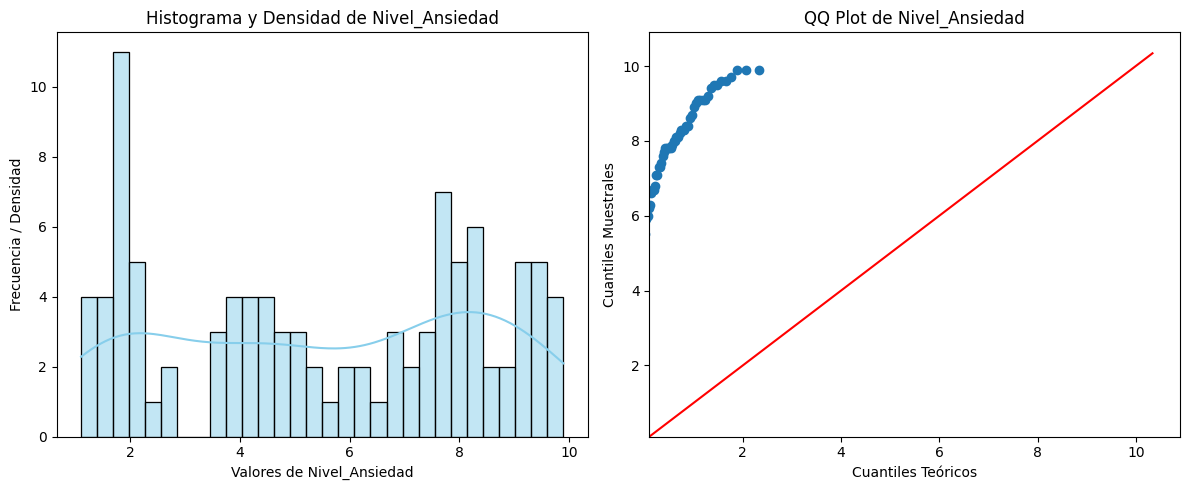

In [22]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

for i in data_clean.columns:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5)) 
    sns.histplot(data_clean[i].values, kde=True, ax=ax[0], bins=30, color="skyblue", edgecolor="black")
    ax[0].set_title(f"Histograma y Densidad de {i}")
    ax[0].set_xlabel(f"Valores de {i}")
    ax[0].set_ylabel("Frecuencia / Densidad")
    sm.qqplot(data_clean[i].values, line='45', ax=ax[1])
    ax[1].set_title(f"QQ Plot de {i}")
    data_min, data_max = data_clean[i].min(), data_clean[i].max()
    ax[1].set_xlim(data_min - 1, data_max + 1)
    ax[1].set_ylim(data_min - 1, data_max + 1)
    ax[1].set_xlabel("Cuantiles Teóricos")
    ax[1].set_ylabel("Cuantiles Muestrales")
    plt.tight_layout()
    plt.show()

In [30]:
#deteccion de outliers con la tecnica de mahalanobis
from scipy.stats import chi2
from scipy.spatial import distance
def mahalanobis(df):
    x_minus_mu = df - np.mean(df)
    cov = np.cov(df.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()
mahal = mahalanobis(data)
chi2.ppf((1-0.01), df=2)
outliers = np.where(mahal > chi2.ppf((1-0.01), df=2))
data_clean.iloc[outliers]


,ID,Edad,Ingreso,Nivel_Estres,Nivel_Ansiedad
0,1,34.0,28769.0,8.9,9.5
1,2,29.0,43690.0,7.7,4.5
2,3,29.0,44859.0,7.3,9.7
3,4,42.0,37966.0,7.3,9.1
4,5,28.0,47581.0,4.2,2.8
...,...,...,...,...,...
95,96,18.0,55780.0,6.2,2.1
96,97,32.0,36742.0,4.5,2.1
97,98,32.0,52306.0,6.8,6.8
98,99,30.0,50873.0,5.1,7.7


In [31]:
outliers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),)